In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from sklearn.metrics import classification_report

In [6]:
data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [7]:
data['X'].shape

(5000, 400)

In [8]:
data['y'].shape

(5000, 1)

In [9]:
sample_idx = np.random.choice(np.arange(data['X'].shape[0]),100)
sample_images = data['X'][sample_idx,:]
sample_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
sample_images.shape

(100, 400)

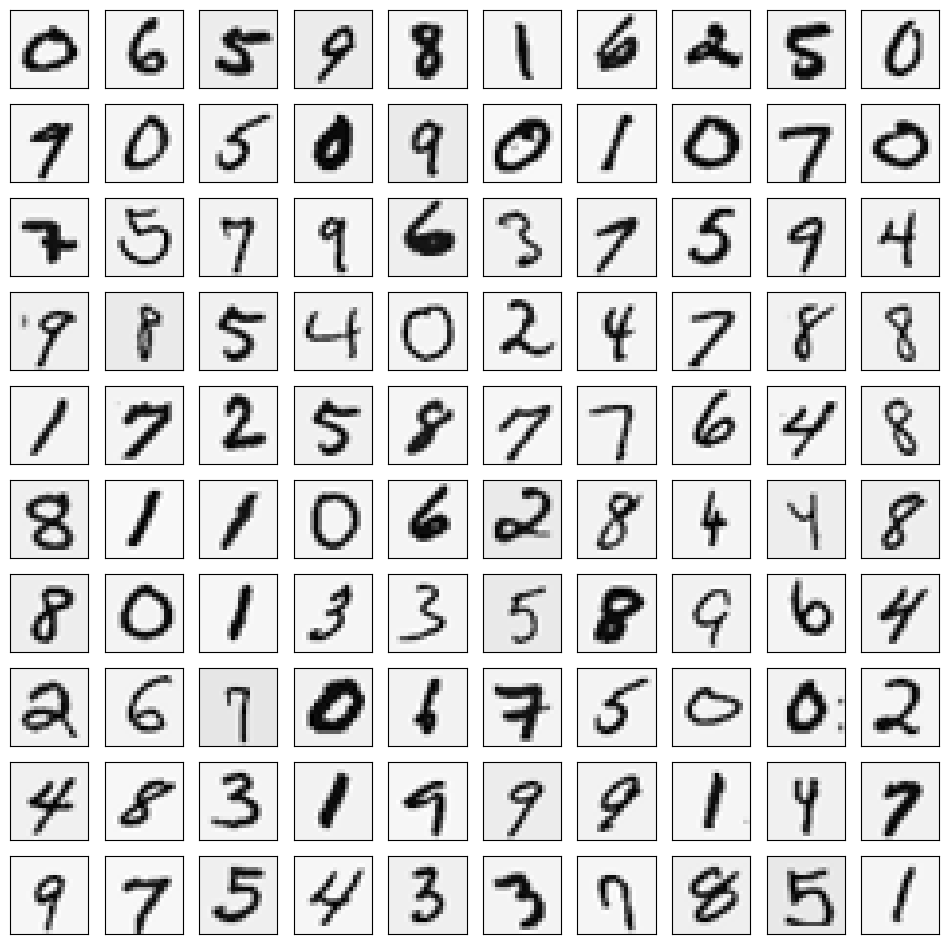

In [11]:
fig,ax_array = plt.subplots(nrows = 10,ncols = 10,sharey = True,sharex = True,figsize = (12,12))
for r in range (10):
  for c in range(10):
    ax_array[r,c].matshow(np.array(sample_images[10 * r + c].reshape((20,20))).T,cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

In [12]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [18]:
def cost(theta,X,y,learningRate):
  theta = np.matrix(theta)
  X = np.matrix(X)
  y = np.matrix(y)
  first = np.multiply(-y,np.log(sigmoid(X * theta.T)))
  second = np.multiply((1 - y),np.log(1 - sigmoid(X * theta.T)))
  reg = (learningRate / (2 * len(X))) * np.sum(sum(np.power(theta[:,1:theta.shape[1]],2)))
  return np.sum(first - second) / len(X) + reg

In [14]:
def gradient(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    error = sigmoid(X * theta.T) - y

    grad = ((X.T * error) / len(X)).T + ((learningRate / len(X)) * theta)

    grad[0, 0] = np.sum(np.multiply(error, X[:,0])) / len(X)

    return np.array(grad).ravel()

In [19]:
from scipy.optimize import minimize

def one_vs_all(X, y, num_labels, learning_rate):
    rows = X.shape[0]
    params = X.shape[1]

    all_theta = np.zeros((num_labels, params + 1))

    X = np.insert(X, 0, values=np.ones(rows), axis=1)

    for i in range(1, num_labels + 1):
        theta = np.zeros(params + 1)
        y_i = np.array([1 if label == i else 0 for label in y])
        y_i = np.reshape(y_i, (rows, 1))

        fmin = minimize(fun=cost, x0=theta, args=(X, y_i, learning_rate), method='TNC', jac=gradient)
        all_theta[i-1,:] = fmin.x

    return all_theta

In [20]:
rows = data['X'].shape[0]
params = data['X'].shape[1]

all_theta = np.zeros((10, params + 1))

X = np.insert(data['X'], 0, values=np.ones(rows), axis=1)

theta = np.zeros(params + 1)

y_0 = np.array([1 if label == 0 else 0 for label in data['y']])
y_0 = np.reshape(y_0, (rows, 1))

X.shape, y_0.shape, theta.shape, all_theta.shape

((5000, 401), (5000, 1), (401,), (10, 401))

In [21]:
all_theta = one_vs_all(data['X'], data['y'], 10, 1)
all_theta

array([[-2.38071744e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30423494e-03, -6.90953144e-10,  0.00000000e+00],
       [-3.18401918e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.46041568e-03, -5.08543775e-04,  0.00000000e+00],
       [-4.79836700e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.86885299e-05, -2.47228173e-07,  0.00000000e+00],
       ...,
       [-7.98574789e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.96249324e-05,  7.22537127e-06,  0.00000000e+00],
       [-4.56929303e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33679502e-03,  9.98739722e-05,  0.00000000e+00],
       [-5.40181963e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16659235e-04,  7.88015976e-06,  0.00000000e+00]])

In [22]:
def predict_all(X, all_theta):
    rows = X.shape[0]
    params = X.shape[1]
    num_labels = all_theta.shape[0]

    X = np.insert(X, 0, values=np.ones(rows), axis=1)

    X = np.matrix(X)
    all_theta = np.matrix(all_theta)

    h = sigmoid(X * all_theta.T)

    h_argmax = np.argmax(h, axis=1)

    h_argmax = h_argmax + 1

    return h_argmax

In [24]:
y_pred = predict_all(data['X'], all_theta)
y_pred = np.asarray(y_pred)
print(classification_report(data['y'], y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500
          10       0.97      0.99      0.98       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000

